# Quantization

## Train a hand written digits model

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train), len(X_test)

(60000, 10000)

In [4]:
X_train[0].shape

(28, 28)

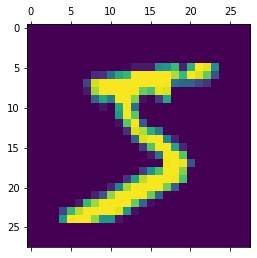

In [5]:
plt.matshow(X_train[0])

In [6]:
y_train[0]

5

In [7]:
X_train = X_train / 255
X_test = X_test / 255

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

X_train_flattened.shape

(60000, 784)

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2695 - accuracy: 0.9223
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1219 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0856 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0647 - accuracy: 0.9809
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0523 - accuracy: 0.9841


In [9]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0769 - accuracy: 0.9764


[0.07688568532466888, 0.9764000177383423]

## Export to a disk and check the size of that model

In [10]:
model.save("./saved_model/")

## Post training quantization

### Without quantization

In [11]:
converter = tf.lite.TFLiteConverter.from_saved_model("./saved_model")
tflite_model = converter.convert()

### With quantization

In [12]:
converter = tf.lite.TFLiteConverter.from_saved_model("./saved_model")
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

In [13]:
len(tflite_model)

319748

In [14]:
len(tflite_quant_model)

84616

In [15]:
# Check sizes
with open("tflite_model.tflite", "wb") as f:
    f.write(tflite_model)

with open("tflite_quant_model.tflite", "wb") as f:
    f.write(tflite_quant_model)